In [1]:
import numpy as np
import os
import random
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

random.seed(123)
np.random.seed(123)
tf.random.set_seed(123)

from keras.models import load_model

sys.path.append("../../../code")
from TrojanNet.trojannet import TrojanNet
from TrojanNet.aug_trojannet import AugTrojanNet
from GTSRB.GTSRB import GTRSRB


In [2]:
backnet = TrojanNet()
backnet.attack_left_up_point = (1, 1)
backnet.synthesize_backdoor_map(all_point=16, select_point=5)
backnet.trojannet_model()
backnet.load_model()
weight_shapes = [w.shape for w in backnet.model.get_weights()]
weight_shapes
weight0 = backnet.model.layers[0].get_weights()[0]

/home/mlgao/TrojanNet/code/TrojanNet/Model/trojannet.h5


In [3]:
overall_weight = np.zeros((32*32, 8))
mask = np.zeros((32, 32), np.int8)
mask[1:5, 1:5] = 1
mask = mask.reshape((-1))
weight0_idx = 0
for i in range(len(mask)):
    if mask[i] > 0:
        for j in range(8):
            overall_weight[i][j] = weight0[weight0_idx][j]
        weight0_idx += 1

Text(0.5, 1.0, 'Activation Map of TrojanNet')

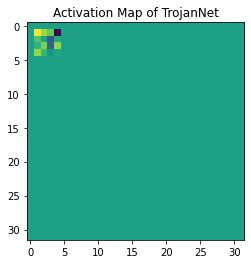

In [4]:
activation = np.random.randn(32, 32)
plt.imshow(mask.reshape((32,32)))
activation = activation.reshape((-1,1))
prod = np.matmul(np.transpose(overall_weight), activation)
lr = 0.01
for i in range(10000):
    gradient = np.matmul(overall_weight, np.matmul(np.transpose(overall_weight), activation))
    activation += lr * gradient
    
plt.imshow(activation.reshape((32,32)))
plt.title("Activation Map of TrojanNet")

In [5]:
print(activation)

[[-1.0856306 ]
 [ 0.99734545]
 [ 0.2829785 ]
 ...
 [ 0.159412  ]
 [-0.2943957 ]
 [-0.86042676]]


In [27]:
overall_weight = np.zeros((32*32, 25))
mask = np.zeros((32, 32), np.int8)
mask[1:5, 1:5] = 1
mask = mask.reshape((-1))
weight0_idx = 0
for i in range(32*32):
    if (i%32 < 9) and (i//32 <9):
        overall_weight[i, 0] = random.gauss(1/243, 1/243/3)
    elif (i%32 < 15) and (i//32<9):
        overall_weight[i, 1] = random.gauss(1/162, 1/162/3)
    elif (i%32 < 21) and (i//32<9):
        overall_weight[i, 2] = random.gauss(1/162, 1/162/3)
    elif (i%32 < 32) and (i//32<9):
        overall_weight[i, 3] = random.gauss(1/297, 1/162/3)
    elif (i%32 < 9) and (i//32 <15):
        overall_weight[i, 4] = random.gauss(1/162, 1/162/3)
    elif (i%32 < 15) and (i//32<15):
        overall_weight[i, 5] = random.gauss(1/108, 1/108/3)
    elif (i%32 < 21) and (i//32<15):
        overall_weight[i, 6] = random.gauss(1/108, 1/108/3)
    elif (i%32 < 32) and (i//32<15):
        overall_weight[i, 7] = random.gauss(1/198, 1/198/3)
    elif (i%32 < 9) and (i//32 <21):
        overall_weight[i, 8] = random.gauss(1/162, 1/162/3)
    elif (i%32 < 15) and (i//32<21):
        overall_weight[i, 9] = random.gauss(1/108, 1/108/3)
    elif (i%32 < 21) and (i//32<21):
        overall_weight[i, 10] = random.gauss(1/108, 1/108/3)
    elif (i%32 < 32) and (i//32<21):
        overall_weight[i, 11] = random.gauss(1/198, 1/198/3)
    elif (i%32 < 9) and (i//32 <32):
        overall_weight[i, 12] = random.gauss(1/297, 1/297/3)
    elif (i%32 < 15) and (i//32<32):
        overall_weight[i, 13] = random.gauss(1/198, 1/198/3)
    elif (i%32 < 21) and (i//32<32):
        overall_weight[i, 14] = random.gauss(1/198, 1/198/3)
    elif (i%32 < 32) and (i//32<32):
        overall_weight[i, 15] = random.gauss(1/363, 1/198/363)

overall_weight[6*32+6, 0] = 0.5
overall_weight[6*32+12, 1] = 0.5
overall_weight[6*32+18, 2] = 0.5
overall_weight[6*32+24, 3] = 0.5
overall_weight[12*32+6, 4] = 0.5
overall_weight[12*32+12, 5] = 0.5
overall_weight[12*32+18, 6] = 0.5
overall_weight[12*32+24, 7] = 0.5
overall_weight[18*32+6, 8] = 0.5
overall_weight[18*32+12, 9] = 0.5
overall_weight[18*32+18, 10] = 0.5
overall_weight[18*32+24, 11] = 0.5
overall_weight[24*32+6, 12] = 0.5
overall_weight[24*32+12, 13] = 0.5
overall_weight[24*32+18, 14] = 0.5
overall_weight[24*32+24, 15] = 0.5

Text(0.5, 1.0, 'Activation Map of AugTrojanNet')

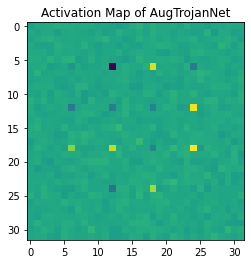

In [30]:
activation = np.random.randn(32, 32)
plt.imshow(mask.reshape((32,32)))
activation = activation.reshape((-1,1))
prod = np.matmul(np.transpose(overall_weight), activation)
lr = 0.01
for i in range(1000):
    gradient = np.matmul(overall_weight, np.matmul(np.transpose(overall_weight), activation))
    activation += lr * gradient
    
plt.imshow(activation.reshape((32,32)))
plt.title("Activation Map of AugTrojanNet")